<a href="https://colab.research.google.com/github/01-vyom/Machine-Learning-Projects/blob/master/Kaggle/%20House%20Prices%3A%20Advanced%20Regression%20Techniques/Multi_Feature_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
# first step is to import the libraries that are currently required
import pandas as p
import matplotlib.pyplot as plt
# x_data = range(0,l_data.shape[0]
import seaborn as sb
#LotFrontage
#LotArea
#YearBuilt
#TotalBsmtsf
#GarageArea
#PoolArea

import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
p.options.display.max_rows = 25
p.options.display.float_format = '{:.1f}'.format


In [0]:
l_data = p.read_csv('/content/drive/My Drive/kaggle/house_price_prediction/train.csv')
l_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = l_data.select_dtypes(include=numerics)

In [0]:
newdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [0]:
l_data=newdf.drop(columns=['Id','MoSold','PoolArea'])

In [0]:
l_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,43.5,2007.8,180921.2
std,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,496.1,1.3,79442.5
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,34900.0
25%,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,129975.0
50%,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,2008.0,163000.0
75%,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,15500.0,2010.0,755000.0


In [0]:
l_data['LotFrontage'].fillna(70,inplace=True)

In [0]:
l_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,43.5,2007.8,180921.2
std,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,496.1,1.3,79442.5
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,34900.0
25%,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,129975.0
50%,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,2008.0,163000.0
75%,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,15500.0,2010.0,755000.0


In [0]:
l_data['MasVnrArea'].fillna(103.7,inplace=True)

In [0]:
l_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,43.5,2007.8,180921.2
std,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,180.6,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,496.1,1.3,79442.5
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,34900.0
25%,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,129975.0
50%,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,2008.0,163000.0
75%,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,164.2,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,15500.0,2010.0,755000.0


In [0]:
l_data['MasVnrArea'].fillna(103.7,inplace=True)
l_data['GarageYrBlt'].fillna(1.8,inplace=True)

In [0]:
l_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1868.8,1.8,473.0,94.2,46.7,22.0,3.4,15.1,43.5,2007.8,180921.2
std,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,180.6,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,453.3,0.7,213.8,125.3,66.3,61.1,29.3,55.8,496.1,1.3,79442.5
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,34900.0
25%,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1958.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,129975.0
50%,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1977.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,2008.0,163000.0
75%,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,164.2,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2001.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,15500.0,2010.0,755000.0


In [0]:
def preprocess_features(l_data):
  temp = l_data.copy()
  temp1=(temp-temp.min())/(temp.max()-temp.min())
  processed_features = temp1.copy()
  return processed_features
def preprocess_target(l_data):
  out_target = l_data[["SalePrice"]]/100
  return out_target

data_target = preprocess_target(l_data)
l_data=l_data.drop(columns=['SalePrice'])
data_feature = preprocess_features(l_data)
data_feature.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.2,0.2,0.0,0.6,0.6,0.7,0.6,0.1,0.1,0.0,0.2,0.2,0.2,0.2,0.0,0.2,0.1,0.0,0.5,0.2,0.4,0.3,0.4,0.2,0.9,0.4,0.3,0.1,0.1,0.0,0.0,0.0,0.0,0.5
std,0.2,0.1,0.0,0.2,0.1,0.2,0.3,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.2,0.3,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.1,0.0,0.4,0.5,0.6,0.3,0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.3,0.0,0.2,0.3,0.2,0.0,1.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2
50%,0.2,0.2,0.0,0.6,0.5,0.7,0.7,0.0,0.1,0.0,0.2,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.7,0.0,0.4,0.3,0.3,0.3,1.0,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5
75%,0.3,0.2,0.0,0.7,0.6,0.9,0.9,0.1,0.1,0.0,0.3,0.2,0.2,0.4,0.0,0.3,0.3,0.0,0.7,0.5,0.4,0.3,0.4,0.3,1.0,0.5,0.4,0.2,0.1,0.0,0.0,0.0,0.0,0.8
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
data_target.describe()

,SalePrice
count,1460.0
mean,1809.2
std,794.4
min,349.0
25%,1299.8
50%,1630.0
75%,2140.0
max,7550.0


In [0]:
def my_in_fn(features,targets,batch_size = 1,shuffle = True, num_epochs = None):
  features = {key:np.array(value) for key,value in dict(features).items()}
  ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
  ds = ds.batch(batch_size).repeat(num_epochs)
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])



def train_model(learning_rate,
  steps,
  batch_size,
  training_examples,
  training_targets):
  
  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # 1. Create input functions.
  training_input_fn = lambda: my_in_fn(training_examples,training_targets["SalePrice"],batch_size=batch_size)
  predict_training_input_fn = lambda: my_in_fn(
      training_examples, 
      training_targets["SalePrice"],
      num_epochs=1,
      shuffle=False)
  
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # 2. Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  
  plt.legend()

  return linear_regressor
  

Training model...
RMSE (on training data):
  period 00 : 1559.99
  period 01 : 1164.58
  period 02 : 819.32
  period 03 : 625.91
  period 04 : 586.99
  period 05 : 572.65
  period 06 : 561.10
  period 07 : 550.52
  period 08 : 540.57
  period 09 : 531.11
Model training finished.


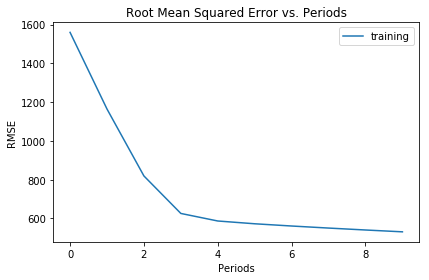

In [0]:
linear_regressor = train_model(
    learning_rate=0.8,
    steps=500,
    batch_size=5,
    training_examples=data_feature,
    training_targets=data_target
    )

In [0]:
lt_data = p.read_csv('/content/drive/My Drive/kaggle/house_price_prediction/test.csv')

In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf1 = lt_data.select_dtypes(include=numerics)

In [0]:
lt_data=newdf1.drop(columns=['Id','MoSold','PoolArea'])
lt_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold
count,1459.0,1232.0,1459.0,1459.0,1459.0,1459.0,1459.0,1444.0,1458.0,1458.0,1458.0,1458.0,1459.0,1459.0,1459.0,1459.0,1457.0,1457.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1381.0,1458.0,1458.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0
mean,57.4,68.6,9819.2,6.1,5.6,1971.4,1983.7,100.7,439.2,52.6,554.3,1046.1,1156.5,326.0,3.5,1486.0,0.4,0.1,1.6,0.4,2.9,1.0,6.4,0.6,1977.7,1.8,472.8,93.2,48.3,24.2,1.8,17.1,58.2,2007.8
std,42.7,22.4,4955.5,1.4,1.1,30.4,21.1,177.6,455.3,176.8,437.3,442.9,398.2,420.6,44.0,485.6,0.5,0.3,0.6,0.5,0.8,0.2,1.5,0.6,26.4,0.8,217.0,127.7,68.9,67.2,20.2,56.6,630.8,1.3
min,20.0,21.0,1470.0,1.0,1.0,1879.0,1950.0,0.0,0.0,0.0,0.0,0.0,407.0,0.0,0.0,407.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0
25%,20.0,58.0,7391.0,5.0,5.0,1953.0,1963.0,0.0,0.0,0.0,219.2,784.0,873.5,0.0,0.0,1117.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1959.0,1.0,318.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
50%,50.0,67.0,9399.0,6.0,5.0,1973.0,1992.0,0.0,350.5,0.0,460.0,988.0,1079.0,0.0,0.0,1432.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,1979.0,2.0,480.0,0.0,28.0,0.0,0.0,0.0,0.0,2008.0
75%,70.0,80.0,11517.5,7.0,6.0,2001.0,2004.0,164.0,753.5,0.0,797.8,1305.0,1382.5,676.0,0.0,1721.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,72.0,0.0,0.0,0.0,0.0,2009.0
max,190.0,200.0,56600.0,10.0,9.0,2010.0,2010.0,1290.0,4010.0,1526.0,2140.0,5095.0,5095.0,1862.0,1064.0,5095.0,3.0,2.0,4.0,2.0,6.0,2.0,15.0,4.0,2207.0,5.0,1488.0,1424.0,742.0,1012.0,360.0,576.0,17000.0,2010.0


In [0]:
lt_data['LotFrontage'].fillna(68.6,inplace=True)
lt_data['MasVnrArea'].fillna(100.7,inplace=True)
lt_data['GarageYrBlt'].fillna(1977.7,inplace=True)#BsmtFinSF2
lt_data['BsmtFinSF1'].fillna(439.2,inplace=True)#
lt_data['BsmtFinSF2'].fillna(52.6,inplace=True)#BsmtUnfSF
lt_data['BsmtUnfSF'].fillna(554.3,inplace=True)#BsmtUnfSF
lt_data['TotalBsmtSF'].fillna(1046.1,inplace=True)#BsmtUnfSF
lt_data['BsmtFullBath'].fillna(0.4,inplace=True)#BsmtUnfSF
lt_data['BsmtHalfBath'].fillna(0.1,inplace=True)#BsmtUnfSF
lt_data['GarageCars'].fillna(1.8,inplace=True)#BsmtUnfSF
lt_data['GarageArea'].fillna(472.8,inplace=True)#BsmtUnfSF

In [0]:
lt_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold
count,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0
mean,57.4,68.6,9819.2,6.1,5.6,1971.4,1983.7,100.7,439.2,52.6,554.3,1046.1,1156.5,326.0,3.5,1486.0,0.4,0.1,1.6,0.4,2.9,1.0,6.4,0.6,1977.7,1.8,472.8,93.2,48.3,24.2,1.8,17.1,58.2,2007.8
std,42.7,20.6,4955.5,1.4,1.1,30.4,21.1,176.7,455.1,176.7,437.1,442.7,398.2,420.6,44.0,485.6,0.5,0.3,0.6,0.5,0.8,0.2,1.5,0.6,25.7,0.8,217.0,127.7,68.9,67.2,20.2,56.6,630.8,1.3
min,20.0,21.0,1470.0,1.0,1.0,1879.0,1950.0,0.0,0.0,0.0,0.0,0.0,407.0,0.0,0.0,407.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0
25%,20.0,60.0,7391.0,5.0,5.0,1953.0,1963.0,0.0,0.0,0.0,219.5,784.0,873.5,0.0,0.0,1117.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1960.5,1.0,318.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
50%,50.0,68.6,9399.0,6.0,5.0,1973.0,1992.0,0.0,351.0,0.0,460.0,988.0,1079.0,0.0,0.0,1432.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,1977.7,2.0,480.0,0.0,28.0,0.0,0.0,0.0,0.0,2008.0
75%,70.0,78.0,11517.5,7.0,6.0,2001.0,2004.0,162.0,752.0,0.0,797.5,1304.0,1382.5,676.0,0.0,1721.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2001.0,2.0,576.0,168.0,72.0,0.0,0.0,0.0,0.0,2009.0
max,190.0,200.0,56600.0,10.0,9.0,2010.0,2010.0,1290.0,4010.0,1526.0,2140.0,5095.0,5095.0,1862.0,1064.0,5095.0,3.0,2.0,4.0,2.0,6.0,2.0,15.0,4.0,2207.0,5.0,1488.0,1424.0,742.0,1012.0,360.0,576.0,17000.0,2010.0


In [0]:
def my_input_fn1(features, batch_size=1, shuffle=True, num_epochs=None):  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    # Return the next batch of data.
    features= ds.make_one_shot_iterator().get_next()
    return features

In [0]:
testf = preprocess_features(lt_data)

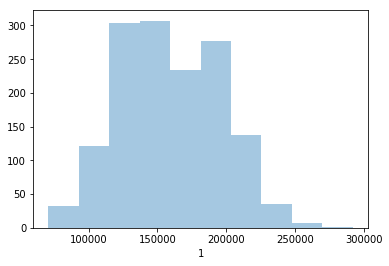

In [0]:

predict_test_input_fn = lambda: my_input_fn1(
      testf, 
 #     test_targets["SalePrice"], 
      num_epochs=1, 
      shuffle=False)

testpf = linear_regressor.predict(input_fn=predict_test_input_fn)
#print(type(test_predictions),list(test_predictions),type(list(test_predictions)))
testpf =([item['predictions'][0] for item in testpf])
#print(test_predictions)
main =[]
k=1461
for i in range(len(testpf)):
  l=[k+i,testpf[i]*100]
  main.append(l)
df = p.DataFrame(main)
sb.distplot(df[1], bins=10, kde=False)
df.to_csv('/content/drive/My Drive/kaggle/house_price_prediction/submission_Multi_feature1.csv', index=False)
#print(len(main))
# df = pd.DataFrame(main)
#main_np = np.array(main)
#pd.DataFrame(main_np).to_csv("/content/drive/My Drive/House Price Prediction/submission.csv")
#print(main_np)
#root_mean_squared_error = math.sqrt(
    #metrics.mean_squared_error(test_predictions, test_targets))

#print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)